In [1]:
import numpy as np
import matplotlib.pyplot as plt

project = 'newfault'
traindate = '2024-10-01'
testdate = '2024-10-02'
traindate_path = '/home/sdybing/gnss-picker/cnn_models_outputs/' + project + '_fq_train/models/traindate_' + traindate + '/'
test_outputs_path = traindate_path + 'data/'
figure_save_dir = traindate_path + 'figures/'
realdata_dir = '/home/sdybing/gnss-picker/data/realdata/summer23/'

rows_w_eqs = np.load(realdata_dir + 'real_metadata_rembad_rows_w_eqs.npy')

# Results columns:

# 0: station name
# 1: date sample came from
# 2: sample start time
# 3: sample end time
# 4: random n counter
# 5: sample P-wave arrives at (gauss pos)
# 6: earthquake magnitude
# 7: result
# 8: PGD
# 9: SNR N
# 10: SNR E
# 11: SNR Z
# 12: mean SNR

In [15]:
metadata = np.load(test_outputs_path + 'real_testing/realtest_metadata_with_results_pgd_snr_thresh0905.npy')

metadata.shape


(994155, 13)

In [16]:
mean_mag = np.mean(metadata[:,6][rows_w_eqs].astype(float))
mean_pgd = np.mean(metadata[:,8][rows_w_eqs].astype(float))

mean_snrs = []

eq_snrs = metadata[:,12][rows_w_eqs]
# print(eq_snrs)

for q in range(len(eq_snrs)):
    
    mean_snr = eq_snrs[q]
    if mean_snr != 'nan':
        mean_snr = mean_snr.astype(float)
        mean_snrs.append(mean_snr)
    

mean_mean_snr = np.mean(np.array(mean_snrs))

print(mean_mag)
print(mean_pgd*100)
print(mean_mean_snr)

4.822227979274611
2.931666909758669
1.1777405876807827


0.135
Mean correct mag: 5.671935483870968
Mean incorrect mag: 4.783300492610838
Mean correct PGD (cm): 4.738955081004236
Mean incorrect PGD (cm): 2.8488699639823944
Mean correct SNR: 3.4791279003977666
Mean incorrect SNR: 1.0631860737927448


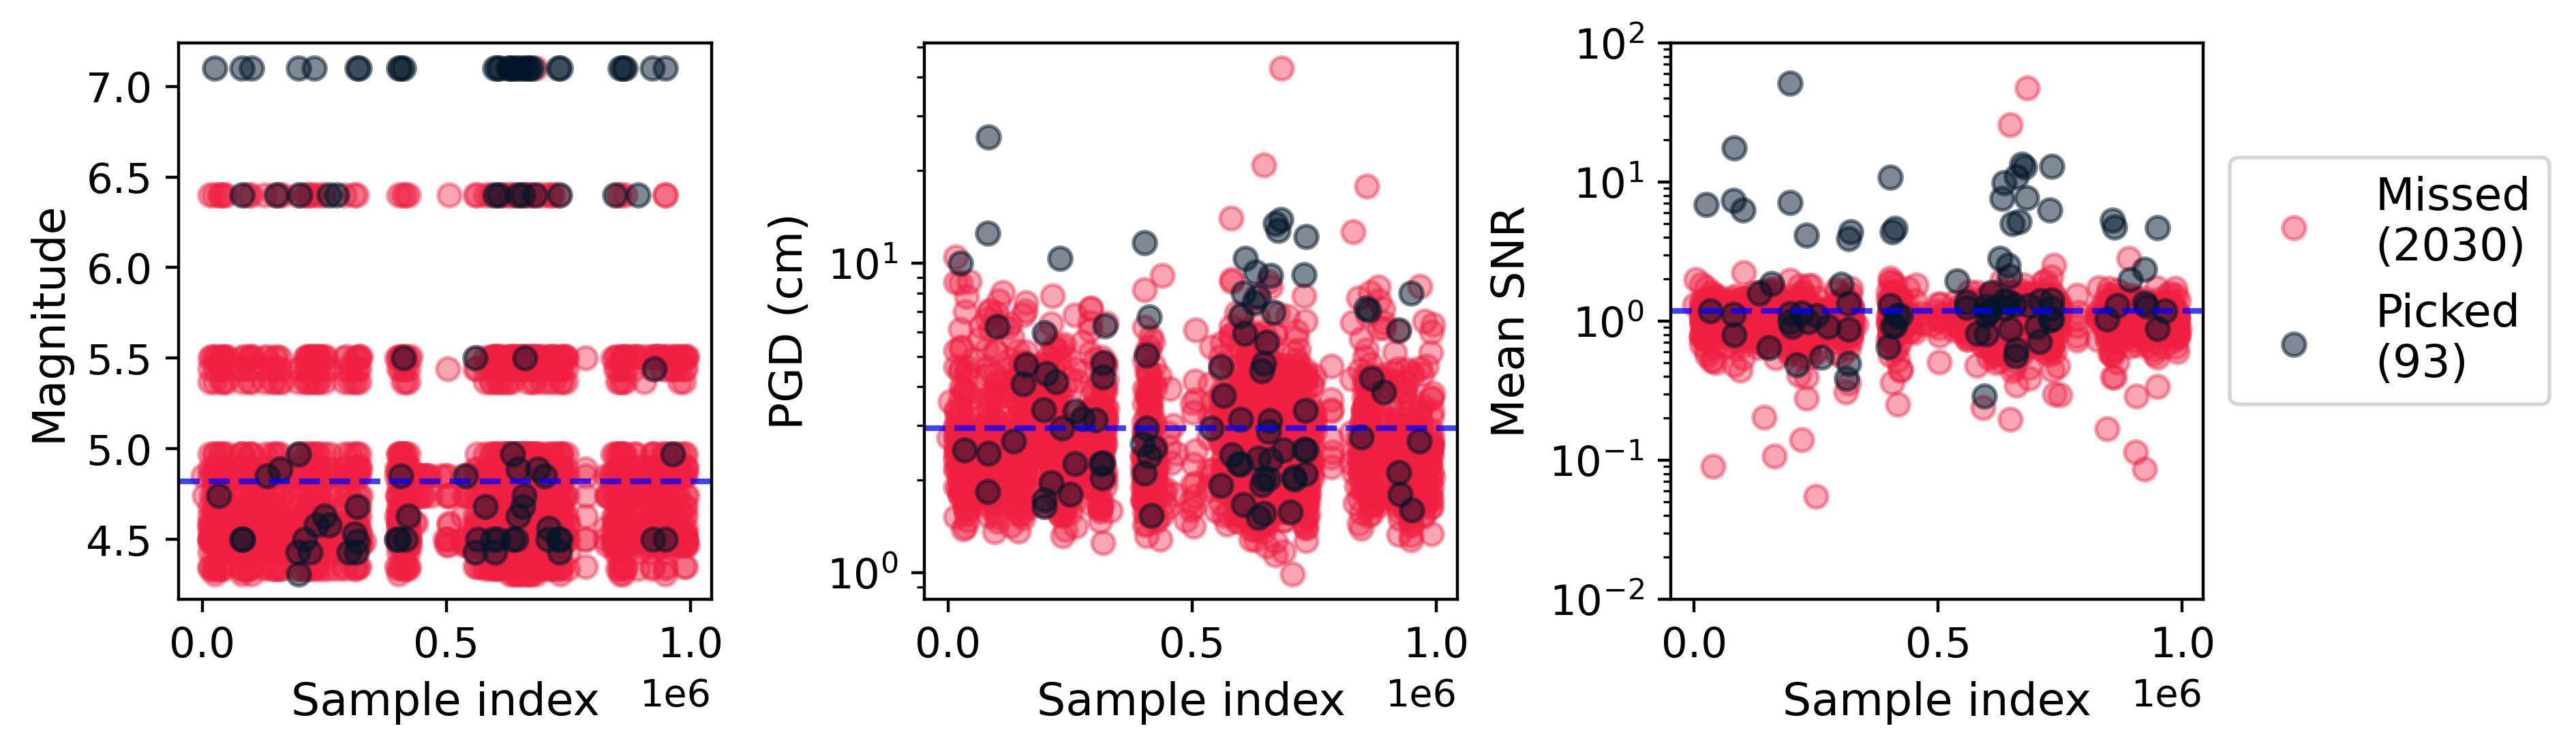

0.905
Mean correct mag: 7.1000000000000005
Mean incorrect mag: 4.81469281663516
Mean correct PGD (cm): 8.746353342771274
Mean incorrect PGD (cm): 2.912431179592749
Mean correct SNR: 7.663906296729512
Mean incorrect SNR: 1.1534608229945038


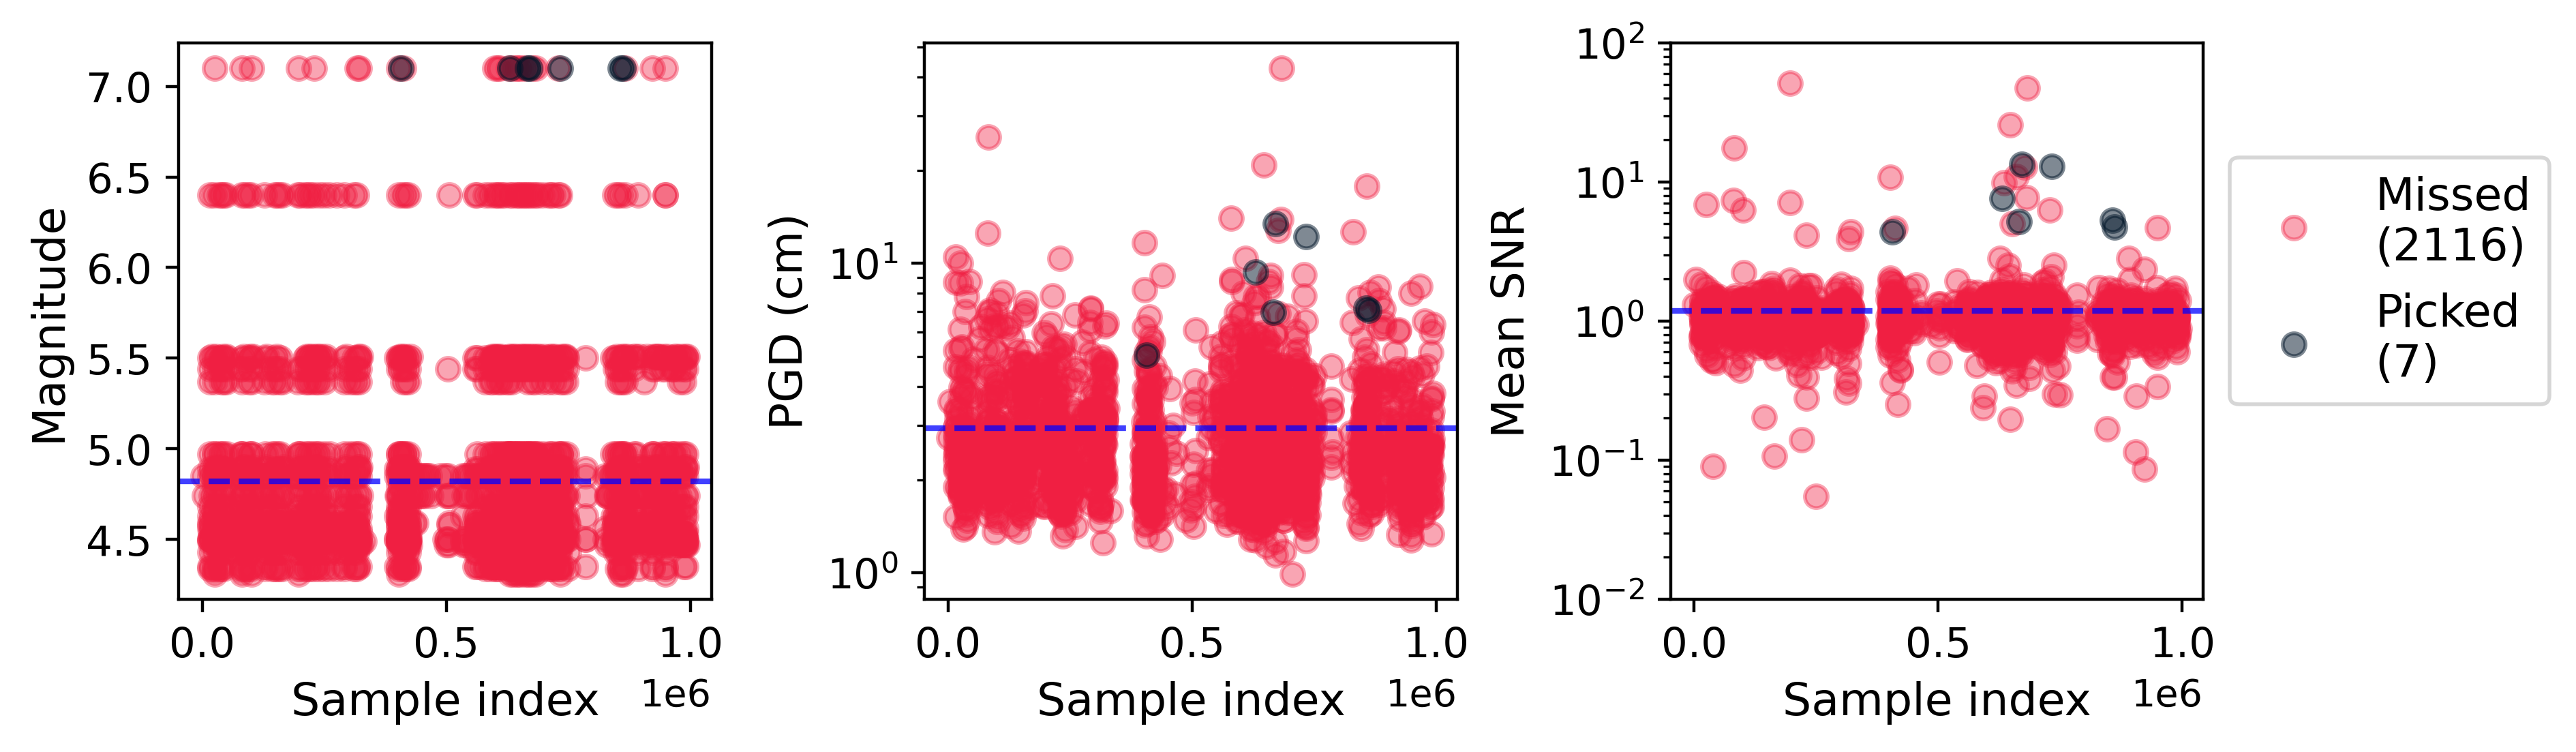

In [24]:
# threshs = [0.025, 0.04, 0.135, 0.905]
# thresh_names = ['0025', '004', '0135', '0905']
threshs = [0.135, 0.905]
thresh_names = ['0135', '0905']

for idx in range(len(threshs)):
    
    best_thresh = threshs[idx]
    print(best_thresh)
    thresh_name = thresh_names[idx]
    counter = 0

    correct_eq_inds = np.load(test_outputs_path + 'real_testing/realtest_data_rows_w_truepos_result_thresh' + thresh_name + '.npy')
    metadata = np.load(test_outputs_path + 'real_testing/realtest_metadata_with_results_pgd_snr_thresh' + thresh_name + '.npy')

    matching_rows_idxinrwe = [] # Finding the indices where the correct rows match the rows with earthquakes
    count = 0

    for j in range(len(correct_eq_inds)):
        correct_row = correct_eq_inds[j]
        for i in range(len(rows_w_eqs)):
            row = rows_w_eqs[i]
            if correct_row == row:
                matching_rows_idxinrwe.append(i)
                count += 1

#     print(count)
#     print(len(matching_rows_idxinrwe))

    incorrect_eq_inds = np.delete(rows_w_eqs, matching_rows_idxinrwe, axis = 0) # Inverse of correct eq inds
#     print(len(incorrect_eq_inds))
    
    mags_correct = metadata[:,6][correct_eq_inds].astype(float)
    mags_incorrect = metadata[:,6][incorrect_eq_inds].astype(float)
    
    print('Mean correct mag: ' + str(np.mean(mags_correct)))
    print('Mean incorrect mag: ' + str(np.mean(mags_incorrect)))

    pgds_m_correct = metadata[:,8][correct_eq_inds].astype(float)
    pgds_m_incorrect = metadata[:,8][incorrect_eq_inds].astype(float)
    
    print('Mean correct PGD (cm): ' + str(np.mean(pgds_m_correct)*100))
    print('Mean incorrect PGD (cm): ' + str(np.mean(pgds_m_incorrect)*100))

    snrsn_correct = metadata[:,9][correct_eq_inds].astype(float)
    snrsn_incorrect = metadata[:,9][incorrect_eq_inds].astype(float)

    snrse_correct = metadata[:,10][correct_eq_inds].astype(float)
    snrse_incorrect = metadata[:,10][incorrect_eq_inds].astype(float)

    snrsz_correct = metadata[:,11][correct_eq_inds].astype(float)
    snrsz_incorrect = metadata[:,11][incorrect_eq_inds].astype(float)

    meansnr_correct = metadata[:,12][correct_eq_inds]
    meansnr_incorrect = metadata[:,12][incorrect_eq_inds]
    
    correctsnrs = []
    for w in range(len(meansnr_correct)):
        mean_snr = meansnr_correct[w]
        if mean_snr != 'nan':
            mean_snr = mean_snr.astype(float)
            correctsnrs.append(mean_snr)
    mean_correct_mean_snr = np.mean(np.array(correctsnrs))
    
    incorrectsnrs = []
    for x in range(len(meansnr_incorrect)):
        mean_snr = meansnr_incorrect[x]
        if mean_snr != 'nan':
            mean_snr = mean_snr.astype(float)
            incorrectsnrs.append(mean_snr)
    mean_incorrect_mean_snr = np.mean(np.array(incorrectsnrs))
    
    print('Mean correct SNR: ' + str(mean_correct_mean_snr))
    print('Mean incorrect SNR: ' + str(mean_incorrect_mean_snr))
    
    meansnr_correct = metadata[:,12][correct_eq_inds].astype(float)
    meansnr_incorrect = metadata[:,12][incorrect_eq_inds].astype(float)

#     print(len(snrsn_correct))
#     print(len(snrsn_incorrect))

    dpi = 400
    plt.figure(figsize = (11,3), dpi = dpi)

    plt.subplot(1,3,1)
    plt.scatter(incorrect_eq_inds, mags_incorrect, label = 'Missed (' + str(len(mags_incorrect)) + ')', color = '#f01f42', alpha = 0.4)
    plt.scatter(correct_eq_inds, mags_correct, label = 'Picked (' + str(len(mags_correct)) + ')', color = '#001528', alpha = 0.5)
    plt.ylabel('Magnitude', fontsize = 12)
    plt.xlabel('Sample index', fontsize = 12)
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    plt.axhline(y = mean_mag, color = 'blue', linestyle = '--', alpha = 0.75)
    # plt.title('Picked vs. Missed Earthquakes by Magnitude', fontsize = 17)
#     plt.legend(loc = (0.67, 0.52), fontsize = 12)

    plt.subplot(1,3,2)
    plt.scatter(incorrect_eq_inds, pgds_m_incorrect*100, label = 'Missed (' + str(len(pgds_m_incorrect)) + ')', color = '#f01f42', alpha = 0.4)
    plt.scatter(correct_eq_inds, pgds_m_correct*100, label = 'Picked (' + str(len(pgds_m_correct)) + ')', color = '#001528', alpha = 0.5)
    plt.ylabel('PGD (cm)', fontsize = 12)
    plt.xlabel('Sample index', fontsize = 12)
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    plt.yscale('log')
    plt.axhline(y = mean_pgd*100, color = 'blue', linestyle = '--', alpha = 0.75)
    # plt.title('Picked vs. Missed Earthquakes by Peak Ground Displacement (cm)', fontsize = 17)
#     plt.legend(loc = 'upper left', fontsize = 12)

    plt.subplot(1,3,3)
    plt.scatter(incorrect_eq_inds, meansnr_incorrect, label = 'Missed\n(' + str(len(meansnr_incorrect)) + ')', color = '#f01f42', alpha = 0.4)
    plt.scatter(correct_eq_inds, meansnr_correct, label = 'Picked\n(' + str(len(meansnr_correct)) + ')', color = '#001528', alpha = 0.5)
    plt.ylabel('Mean SNR', fontsize = 12)
    plt.xlabel('Sample index', fontsize = 12)
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    plt.yscale('log')
    plt.ylim(10**-2,10**2)
    plt.axhline(y = mean_mean_snr, color = 'blue', linestyle = '--', alpha = 0.75)
    # plt.title('Picked vs. Missed Earthquakes by mean Signal to Noise Ratio', fontsize = 17)
    plt.legend(loc = (1.05, 0.35), ncol = 1, fontsize = 12)
    
    plt.subplots_adjust(wspace = 0.4, right = 0.8, bottom = 0.2)
    
    plt.show()
#     plt.savefig('/home/sdybing/gnss-picker/manuscript_figures/real_testdata_pickmiss_' + thresh_name + '.png', format = 'PNG')
#     plt.close();

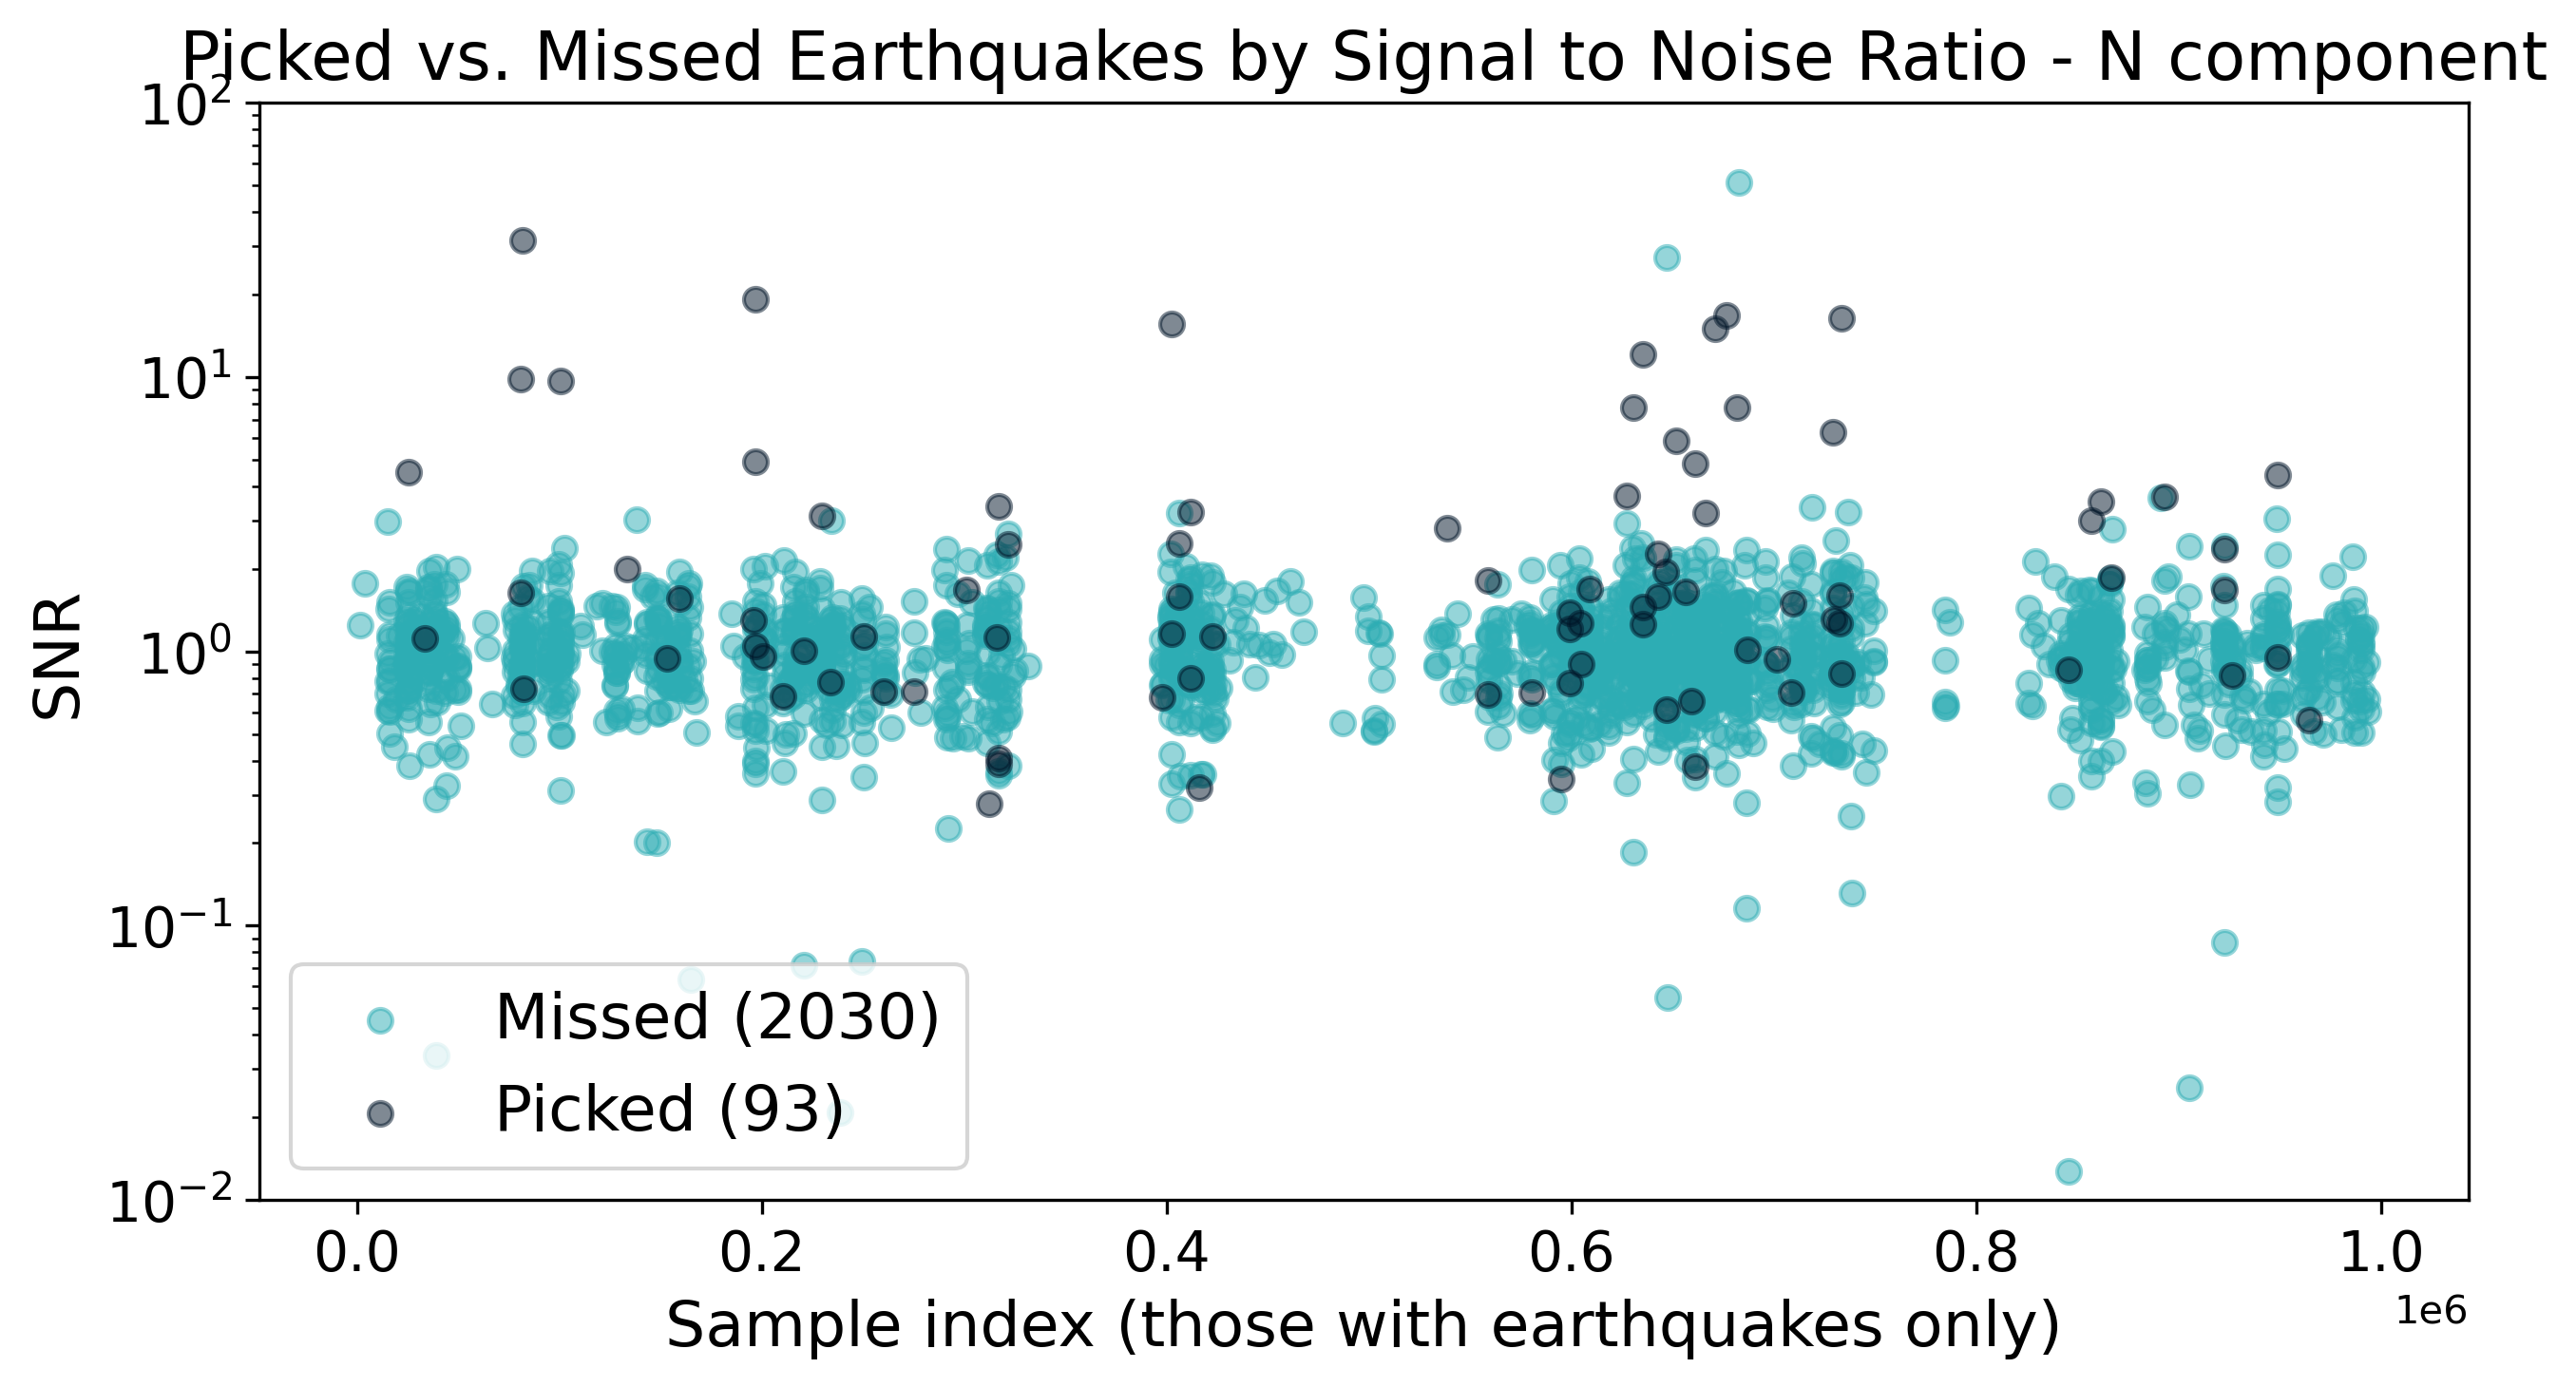

In [10]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(incorrect_eq_inds, snrsn_incorrect, label = 'Missed (' + str(len(snrsn_incorrect)) + ')', color = '#2DADB4', alpha = 0.5)
plt.scatter(correct_eq_inds, snrsn_correct, label = 'Picked (' + str(len(snrsn_correct)) + ')', color = '#001528', alpha = 0.5)
plt.ylabel('SNR', fontsize = 16)
plt.xlabel('Sample index (those with earthquakes only)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yscale('log')
plt.ylim(10**-2,10**2)
plt.title('Picked vs. Missed Earthquakes by Signal to Noise Ratio - N component', fontsize = 17)
plt.legend(loc = 'lower left', fontsize = 16)
# plt.show();
# plt.savefig(figure_save_dir + '20c_realtestdata_pickmiss_SNRN_thresh013.png', format = 'PNG')
# plt.close();

In [11]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(incorrect_eq_inds, snrse_incorrect, label = 'Missed (' + str(len(snrse_incorrect)) + ')', color = '#2DADB4', alpha = 0.5)
plt.scatter(correct_eq_inds, snrse_correct, label = 'Picked (' + str(len(snrse_correct)) + ')', color = '#001528', alpha = 0.5)
plt.ylabel('SNR', fontsize = 16)
plt.xlabel('Sample index (those with earthquakes only)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yscale('log')
plt.ylim(10**-2,10**2)
plt.title('Picked vs. Missed Earthquakes by Signal to Noise Ratio - E component', fontsize = 17)
plt.legend(loc = 'lower left', fontsize = 16)
# plt.show();
plt.savefig(figure_save_dir + '20d_realtestdata_pickmiss_SNRE_thresh013.png', format = 'PNG')
plt.close();

In [12]:
plt.figure(figsize = (10,5), dpi = 300)
plt.scatter(incorrect_eq_inds, snrsz_incorrect, label = 'Missed (' + str(len(snrsz_incorrect)) + ')', color = '#2DADB4', alpha = 0.5)
plt.scatter(correct_eq_inds, snrsz_correct, label = 'Picked (' + str(len(snrsz_correct)) + ')', color = '#001528', alpha = 0.5)
plt.ylabel('SNR', fontsize = 16)
plt.xlabel('Sample index (those with earthquakes only)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.yscale('log')
plt.ylim(10**-2,10**2)
plt.title('Picked vs. Missed Earthquakes by Signal to Noise Ratio - Z component', fontsize = 17)
plt.legend(loc = 'lower left', fontsize = 16)
# plt.show();
plt.savefig(figure_save_dir + '20e_realtestdata_pickmiss_SNRZ_thresh013.png', format = 'PNG')
plt.close();